# Используем функцию read_table() #

Также вам известно, что, указав определенные значения параметров функции read_csv(), можно считать данные из файла, в котором используется разделитель данных, отличный от запятой (sep), вместо десятичной точки используется другой символ (decimal), а также при считывании должно быть пропущено некоторое количество строк (skiprows). 

Такие данные обычно хранятся в текстовых файлах с расширением TXT. Этот тип файлов — источник данных, который легко расшифровывать и интерпретировать. Для чтения данных из файлов такого типа Pandas, помимо функции read_csv(), предлагает и функцию read_table().

Функция read_csv(), как вы уже знаете, загружает данные с разделителями из файла, URL-адреса, и в качестве разделителя по умолчанию используется запятая (символ). В документации эта функция описана как «Чтение данных из файла значений, разделённых запятыми (CSV), в DataFrame».
Функция read_table() также загружает данные с разделителями из файла, URL-адреса, но в качестве разделителя по умолчанию используется символ табуляции ('\t'). В документации эта функция описана как «Чтение данных из файла значений с разделителями в DataFrame».
Данные функции используются похожим образом, и то, что в настоящий момент поддерживаются они обе, обусловлено тем, что многие пользователи продолжают использовать функцию read_table(). Так, например, поиск на GitHub даёт более пятидесяти тысяч результатов по запросу "pd.read_table".

Для демонстрации использования функции read_table() выполним следующее: 

используя  функцию read_csv(), считаем данные из файла countries.csv в переменную countries_data, создав объект DataFrame;
используя уже знакомую функцию to_csv(), выгрузим этот DataFrame в файл countries.txt (с расширением TXT), который сохраним в папке data. В качестве разделителя используется символ пробела (" ").

In [3]:
# Импорт библиотеки pandas — при выполнении последовательно всех примеров ниже
# импорт выполняется один раз
import pandas as pd 
# Загружаем данные из файла в переменную, создавая объект DataFrame
countries_data = pd.read_csv('data/countries.csv', sep=';') 
# Выгружаем данные из DataFrame в CSV-файл и сохраняем файл в папке data
countries_data.to_csv('data/countries.txt', index=False, sep=' ')

Считаем данные из файла countries.txt в переменную txt_df  (объект DataFrame), применив функцию read_table() с параметрами sep=' '  и  index_col=['country'] (так мы избавимся от столбца с индексом и присвоим названия строкам, используя данные одного из столбцов). Выводим на экран полученный результат:

In [4]:
# Загружаем данные из файла в переменную, создавая объект DataFrame
txt_df = pd.read_table('data/countries.txt', sep=' ', index_col=['country'])
# Выводим содержимое DataFrame на экран
display(txt_df)

,population,square
country,,
Англия,56.29,133396
Канада,38.05,9984670
США,322.28,9826630
Россия,146.24,17125191
Украина,45.50,603628
Беларусь,9.50,207600
Казахстан,17.04,2724902


# Применение параметра header #

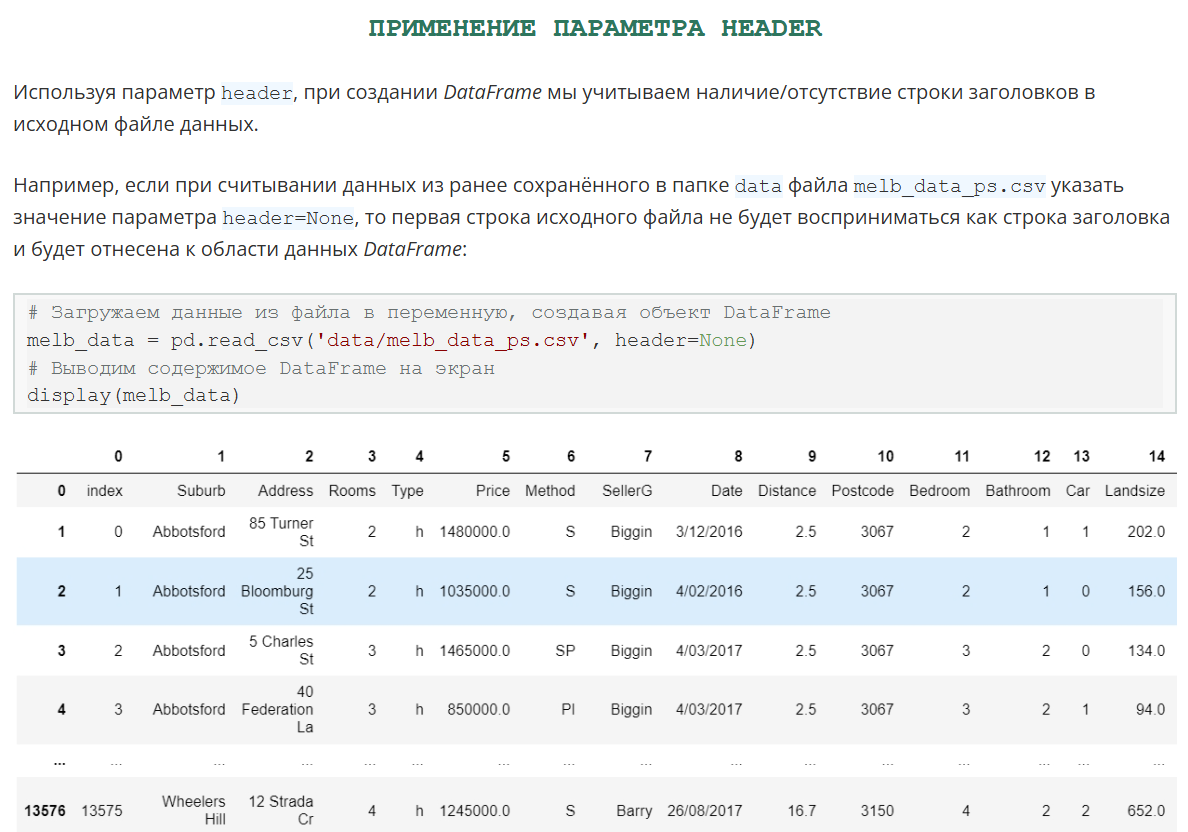

# Решаем проблему с кодировкой исходных данных #

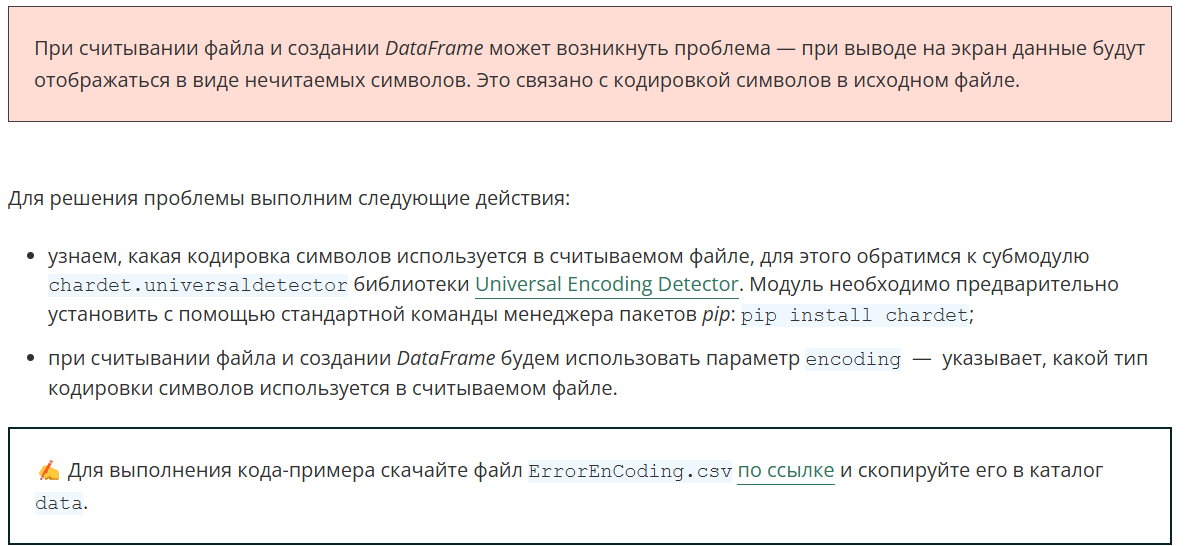

In [5]:
# Считываем данные из файла с неизвестной кодировкой в переменную, создавая объект DataFrame
data=pd.read_csv('data/ErrorEnCoding.csv', header=None, encoding_errors='replace') 
# Выводим содержимое DataFrame на экран
display(data)

,0,1,2
0,User_943,Accumanst@gmail.com,������
1,User_908,Advismowr@mail.ru,������
2,User_962,Anachso@ukr.net,���������
3,User_973,Antecia@inbox.ru,�����
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,������
96,User_901,V2artierso@mail.ru,�����������
97,User_970,Vashoterlo@bk.ru,�������
98,User_965,Visuareda@yahoo.com,�������


Выявлена проблема: при стандартном считывании содержимое файла читается некорректно. Необходимо указать кодировку файла при считывании.

# Определяем кодировку файла #

Приведённый ниже код поможет нам определить используемую кодировку в файле, степень достоверности, используемый язык.

In [7]:
# Импортируем субмодуль chardet.universal
from chardet.universaldetector import UniversalDetector

detector = UniversalDetector()

with open('data/ErrorEnCoding.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
print(detector.close())

{'encoding': 'KOI8-R', 'confidence': 0.8773902118791048, 'language': 'Russian'}


С достоверностью примерно 84 % тип используемой в файле кодировки — koi8-r. Повторим считывание файла, используя полученные данные.

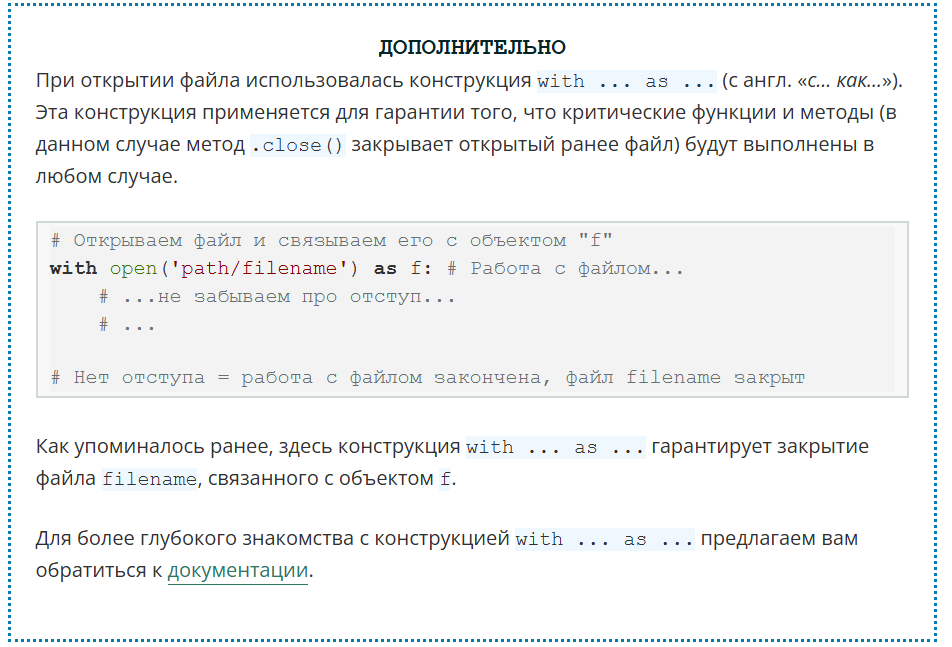

In [8]:
# Создаем DataFrame из файла, явно указав кодировку символов, и выводим его содержимое на экран
data=pd.read_csv('data/ErrorEnCoding.csv', encoding='koi8-r', header=None)
display(data)

,0,1,2
0,User_943,Accumanst@gmail.com,Ижевск
1,User_908,Advismowr@mail.ru,Ижевск
2,User_962,Anachso@ukr.net,Краснодар
3,User_973,Antecia@inbox.ru,Пермь
4,User_902,Balliaryva@ukr.net,
...,...,...,...
95,User_959,UpdatesCurious@yahoo.com,Тюмень
96,User_901,V2artierso@mail.ru,Арзангелтск
97,User_970,Vashoterlo@bk.ru,Воронеж
98,User_965,Visuareda@yahoo.com,Воронеж


# Чтение файла по ссылке, используя функцию read_table() #

Ранее вы уже считывали данные из файла melb_data.csv, который находится в свободном доступе в интернете, используя функцию read_csv(). Попробуем использовать функцию read_table(), указав в качестве разделителя данных запятую — ','.

In [9]:
data = pd.read_table('https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv', sep=',')
display(data)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


# Чтение/запись архивированных CSV-файлов #

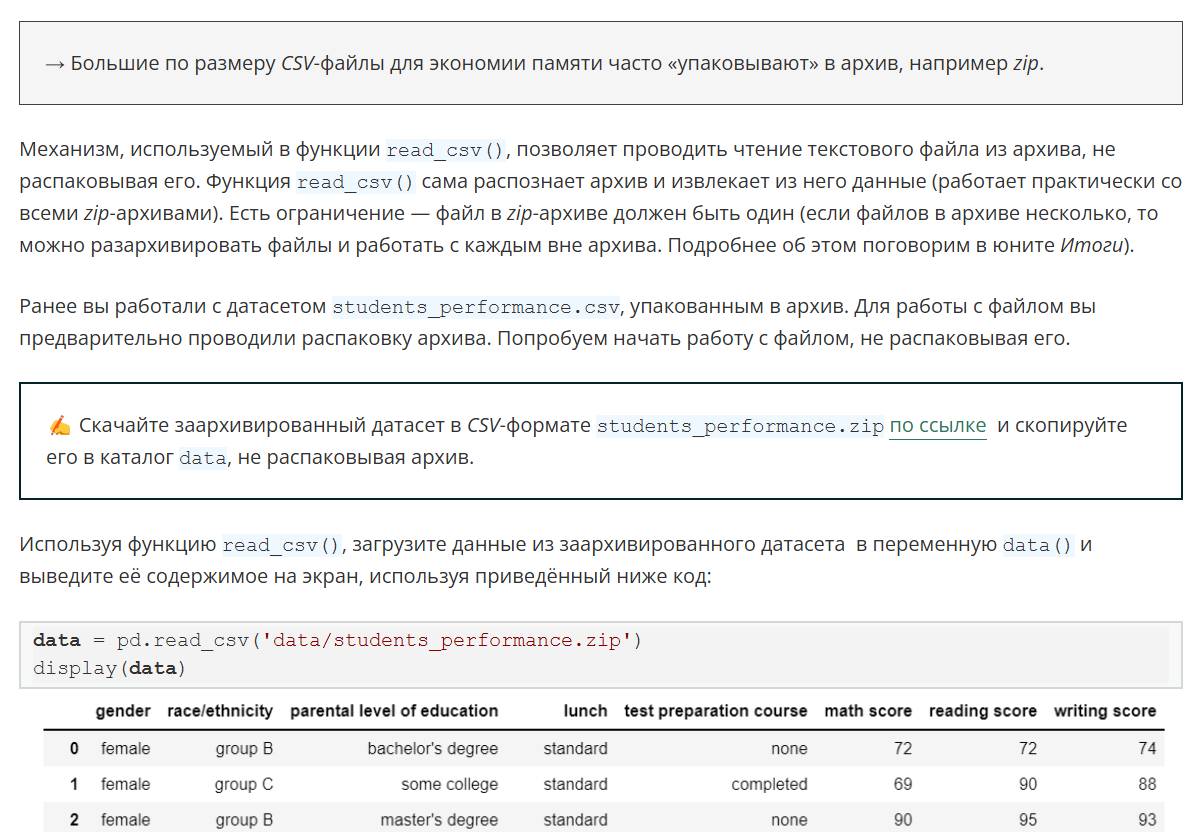

In [10]:
data = pd.read_csv('data/students_performance.zip')
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


В функции to_csv() предусмотрен механизм, позволяющий проводить упаковку CSV-файлов в zip-архив. Проделаем обратную операцию — данные из DataFrame data запишем в CSV-файл, упакуем полученный файл в zip-архив «на лету» и сохраним полученный архив в папке data, выполнив следующий код:

In [11]:
# Определяем параметры архивирования — метод сжатия, имя файла в архиве
compression_opts = dict(method='zip', archive_name='out.csv') 
data.to_csv('data/out.zip', index=False, compression=compression_opts)

# 3. Работа с файлами Excel #

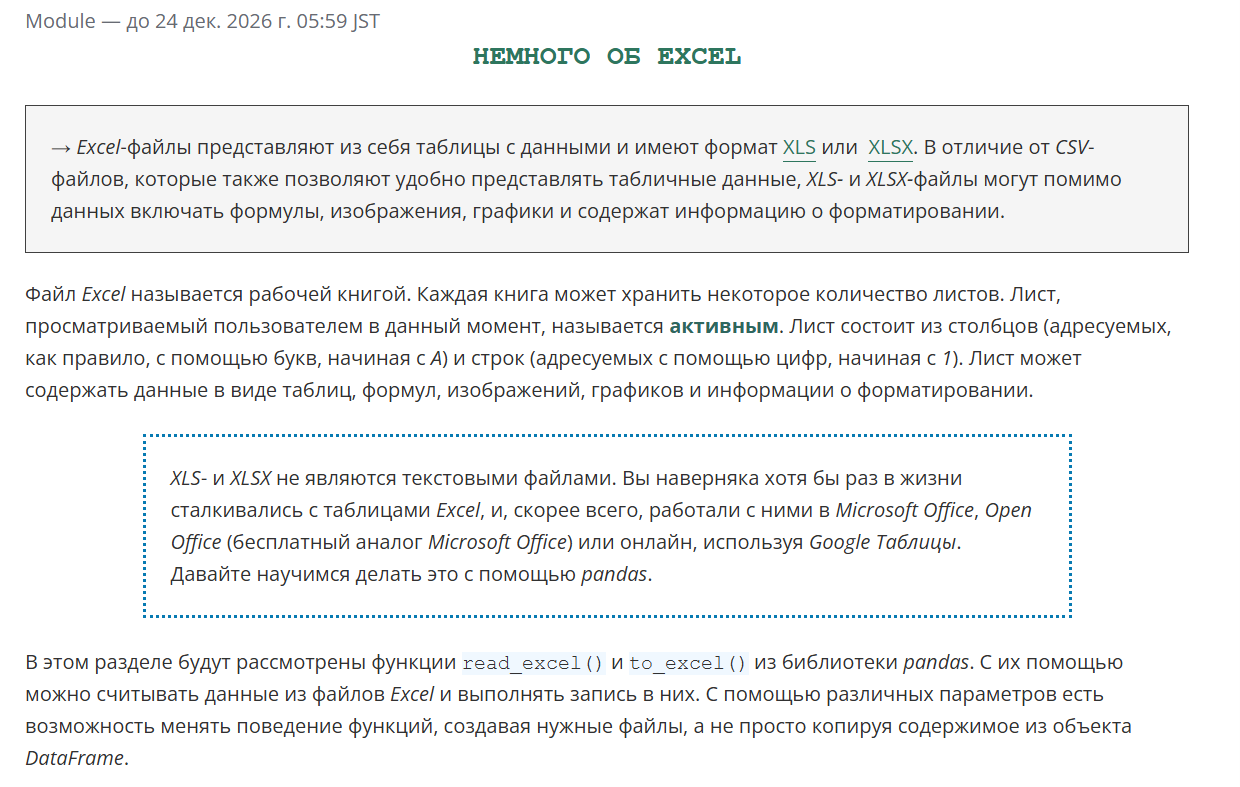

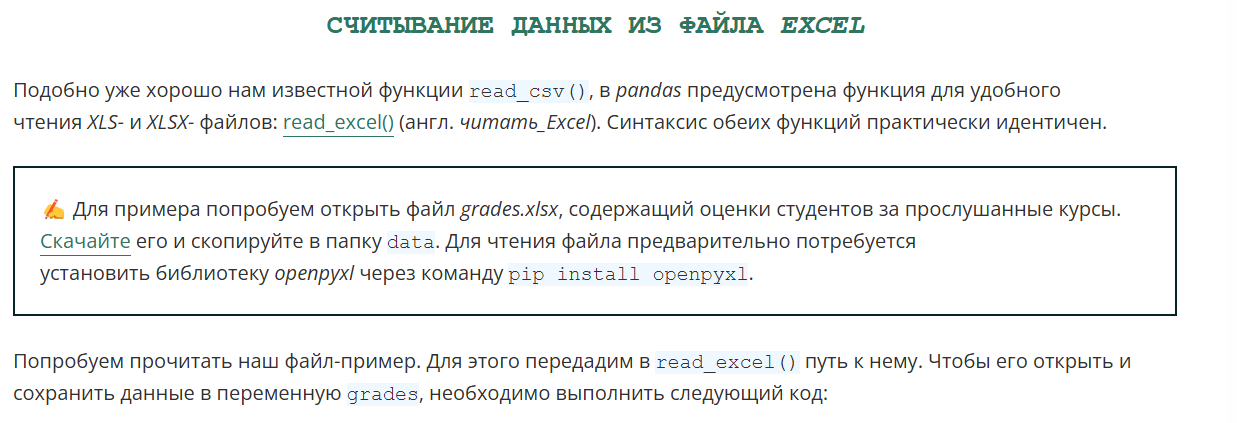

In [14]:
grades = pd.read_excel('data/grades.xlsx')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,8
1,2,Катя,9
2,3,Маша,7
3,4,Миша,4
4,5,Женя,8


Так же, как и read_csv(), функция read_excel() может принимать на вход не только путь к файлу на компьютере, но и интернет-ссылку на него.

# Считывание данных из файла EXCEL по ссылке #

Если файл находится в открытом доступе по ссылке (например, на Google Диске или GitHub), его можно прочитать и из интернета — для этого достаточно в функции read_excel() вместо пути до файла указать ссылку на файл. Например:

In [15]:
data = pd.read_excel('https://github.com/asaydn/test/raw/master/january.xlsx', skiprows=3)
display(data)

,Location,Oranges,Apples,Bananas,Blueberries,Total
0,Toronto,7651,4422,8580,3679,24332
1,Los Angeles,273,2998,9890,7293,20454
2,Atlanta,3758,6752,4599,4149,19258
3,New York,4019,8796,8486,9188,30489


Основные параметры метода read_excel()

io — первый параметр, в который мы передаём адрес файла, который хотим прочитать. Кроме адреса на диске, можно передавать адрес в интернете.

sheet_name —  ссылка на лист в Excel-файле (возможные значения данного параметра: 0 — значение по умолчанию, загружается первый лист; 'Sheet1' — можно передать название листа; обычно листы называются 'SheetX', где X — номер листа, но могут использоваться и другие названия; [0, 1, 'Sheet3'] — список, содержащий номера или названия листов; в таком случае Pandas вернёт словарь, в котором ключами будут номера или названия листов, а значениями — их содержимое в виде DataFrame; None — если передать такое значение, то pandas прочитает все листы и вернёт их в виде словаря, как в предыдущем пункте).

na_values — список значений, которые будут считаться пропусками ( ‘’, ‘#N/A’, ‘ N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’).

Следует также учесть, что нормальное поведение pandas — это считывание значений (формулы из Excel-файла не считываются).

Как упоминалось выше, один Excel-файл может включать в себя несколько листов, которые отображаются в разных вкладках (англ. sheet, рус. лист). Например, в нашем файле два листа — Maths и ML.

По умолчанию в DataFrame читается информация из первого листа, однако read_excel()  позволяет выбрать, из какого именно листа загружать данные. Сделать это можно с помощью параметра sheet_name (рус. имя_листа). Например, чтобы прочесть данные из второго листа (ML) файла, выполним код:

In [16]:
grades = pd.read_excel('data/grades.xlsx', sheet_name='ML')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,7
1,2,Катя,5
2,3,Маша,9
3,4,Миша,8
4,5,Женя,9


In [17]:
grades = pd.read_excel('data/grades.xlsx', sheet_name='Maths')
display(grades.head())

,Student ID,Student name,Grade
0,1,Аня,8
1,2,Катя,9
2,3,Маша,7
3,4,Миша,4
4,5,Женя,8


# Выгрузка данных из DataFrame в Excel-файл #

После обработки данных (очистка, создание новых признаков и т. д.) методами и функциями pandas мы сталкиваемся с обратной задачей — сохранить данные из DataFrame в Excel-файл.

Для этого в pandas есть функция to_excel() (рус. в_Excel), принцип работы которой очень схож с функцией to_csv():

In [18]:
# Сохраняем данные из DataFrame grades в файл grades_new.xlsx в папке data
grades.to_excel('data/grades_new.xlsx')

В этом случае будет создан один лист с именем по умолчанию "Sheet1". Также мы сохраним и индекс — в данных будет находиться лишний столбец. Чтобы создать лист с определённым именем (например, Example) и не сохранять индекс, в метод  to_excel() необходимо передать параметры sheet_name='Example' и index=False:

In [19]:
# Сохраняем данные из DataFrame grades в файл grades_new.xlsx (на листе 'Example') в папке data
grades.to_excel('data/grades_new.xlsx', sheet_name='Example', index=False)

openpyxl — рекомендуемый пакет для чтения и записи файлов Excel 2010+ (например, xlsx);

xlsxwriter — альтернативный пакет для записи данных, информации о форматировании и, в частности, диаграмм в формате Excel 2010+ (например, xlsx);

pyxlsb — пакет позволяет читать файлы Excel в xlsb-формате;

pylightxl — пакет позволяет читать xlsx- и xlsm-файлы и записывать xlsx-файлы;

xlrd — пакет предназначен для чтения данных и информации о форматировании из старых файлов Excel (например, xls);

xlwt — пакет предназначен для записи данных и информации о форматировании в старые файлы Excel (например, xls).

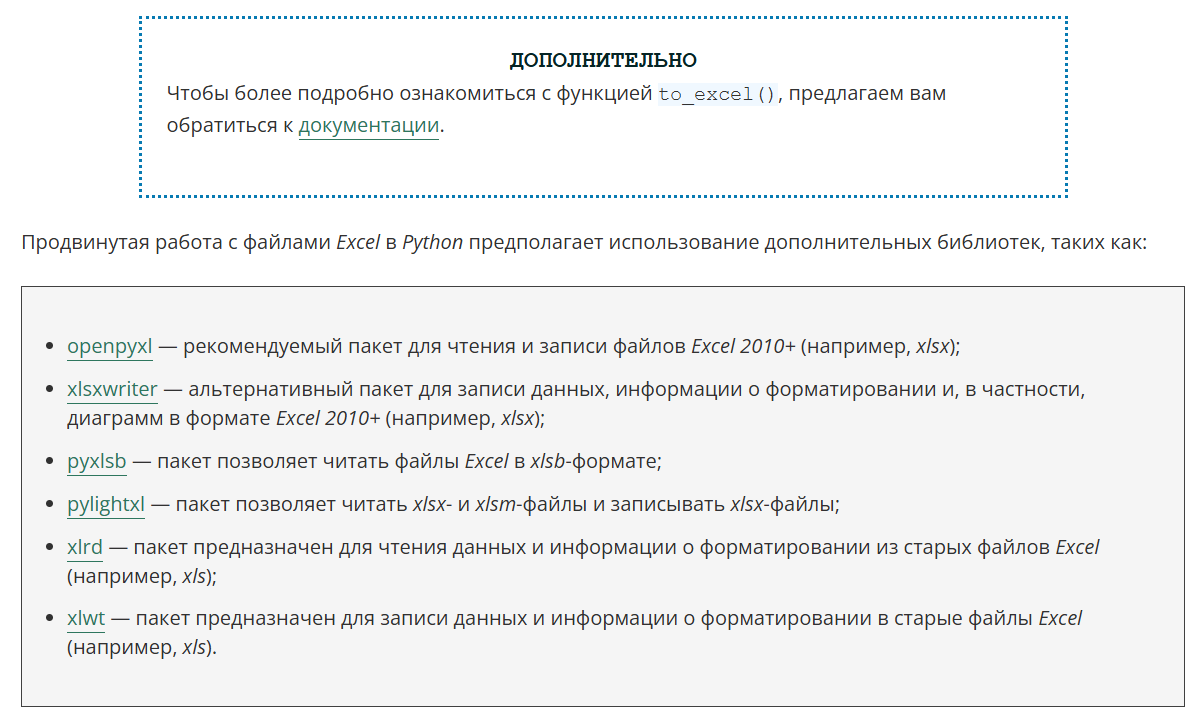

In [21]:
movies_data_ratings = pd.read_excel('data/ratings_movies.xlsx', sheet_name='ratings')
display(movies_data_ratings.head())

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
movies_data_movies = pd.read_excel('data/ratings_movies.xlsx', sheet_name='movies')
display(movies_data_movies.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
joined = movies_data_ratings.merge(movies_data_movies, on='movieId', how='left')
display(joined.head())         
joined.to_excel('data/joined.xlsx', sheet_name='JOINED', index=False)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


# 4. JSON. Что это? #

→ JSON — это простой, структурированный формат обмена данными, основанный на использовании текста.

Под обменом данных в этом контексте чаще всего подразумевается передача данных по компьютерным сетям, например пересылка данных от сервера к браузеру.

Аббревиатура JSON расшифровывается как JavaScript Object Notation, в переводе на русский — система обозначения/записи объектов JavaScript. Несмотря на то, что JSON изначально основывался на языке программирования JavaScript, он является общепризнанным форматом обмена данными, и многие языки программирования, включая Python, содержат эффективные инструменты для работы с ним.

Если вы планируете использовать в своей работе информацию, которая автоматически загружается из каких-либо веб-служб, то умение работать с форматом JSON — это критически важный навык, который обязательно необходимо приобрести.

Именно этим мы сейчас и займёмся!

Итак, JSON — это простой, структурированный, основанный на использовании текста формат обмена данными.

# Модули для работы с JSON #

Для работы с данными в формате JSON используется модуль json из стандартной библиотеки языка Python, который необходимо будет загрузить перед началом работы с данными, выполнив следующую команду:

In [32]:
# Импортируем модуль json
import json

Также нам может быть полезен модуль pprint  (от англ. pretty print, рус. красивый вывод на экран), а точнее — встроенная в него одноимённая функция pprint(), с помощью которой можно красиво выводить на экран содержимое JSON-файла. Для загрузки нужной нам функции перед началом работы выполним следующий код:

In [33]:
# Импортируем функцию pprint()
from pprint import pprint

# КАК ВЫГЛЯДИТ JSON-ФАЙЛ? #

Информация в формате JSON представляет собой (в закодированном виде) одну из двух структур:

набор пар "ключ-значение", где ключ — это всегда строковая величина (в Python такая структура преобразуется в словарь);

упорядоченный набор значений (при чтении JSON-файла в Python эта структура будет преобразована в список).

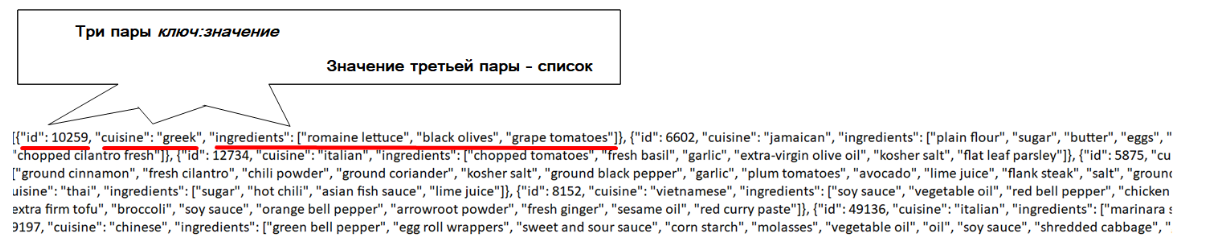

Формат JSON допускает неограниченное количество вложений этих структур друг в друга.

Давайте на примере посмотрим, что это означает. Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов.

# 5. JSON. Открываем JSON-файл и извлекаем данные #

ОТКРЫВАЕМ JSON-ФАЙЛ

→ Чтобы перевести данные из формата JSON в формат, который можно обрабатывать инструментами Python, необходимо выполнить процедуру, которая называется десериализация (декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется сериализацией.

Для выполнения десериализации мы воспользуемся методом load() (от англ. загрузить) модуля json, который принимает на вход ссылку на открытый JSON-файл:

In [35]:
# Открываем файл и связываем его с объектом "f"
with open('recipes.json') as f:  
    # Загружаем содержимое открытого файла в переменную recipes  
    recipes = json.load(f)

Отлично! Теперь содержимое нашего файла загружено в переменную recipes. Давайте выведем его на экран с помощью функции pprint() из одноимённого модуля:

In [36]:
# Выводим на экран содержимое переменной recipes, используя функцию pprint()
pprint(recipes)

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

Итак, мы видим, что рецепт каждого из блюд описан в виде словаря, который состоит из трёх пар "ключ-значение":

Ключ "cuisine" — обозначает принадлежность блюда к определённой национальной кухне (например, 'greek', 'southern_us', 'filipino' и т. д.);

Ключ "id" — уникальный идентификационный номер блюда;

Ключ "ingredients"— содержит перечень продуктов, входящих в состав блюда.

Все рецепты (то есть все словари) хранятся в одном списке, располагаясь последовательно.

# ИЗВЛЕКАЕМ ДАННЫЕ ИЗ JSON-ФАЙЛА #

После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом как с обычными списками и словарями. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности.

Давайте выясним некоторые детали о блюде, которое записано первым в списке блюд. Его индекс — 0, и информация о нём хранится в словаре. Чтобы узнать ID этого блюда, мы можем обратиться к соответствующему ключу словаря, выполнив следующий код:

In [37]:
recipes[0]['id']

10259

Здесь мы сначала извлекаем из списка первый элемент (индекс 0). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать ключ словаря. ID блюда доступно по ключу 'id', и мы указываем этот ключ в отдельной паре квадратных скобок:

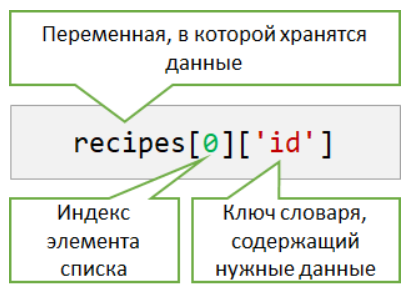

Аналогичным образом, для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ 'id' на 'ingredients'. 

In [38]:
recipes[0]['ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

Мы также можем извлечь информацию о конкретном блюде по его ID. Для этого необходимо с помощью цикла, например for, перебрать все элементы списка, проверяя ключ 'id',  и извлечь нужную информацию, когда мы наконец найдем нужное блюдо.

In [39]:
for recipe in recipes: # начинаем перебор всех блюд входящих в список
    if recipe['id'] == 13121: # если id текущего блюда равен заданному для поиска
        print(recipe['cuisine']) # выводим на экран наименование кухни, к которой относится блюдо
        break # прерываем выполнение цикла, т.к. нужное блюдо найдено

thai


На практике также иногда возникают задачи по извлечению из JSON-файла обобщённой информации. Давайте попробуем решить две такие задачи.

Какое количество уникальных национальных кухонь присутствуют в нашем наборе данных?

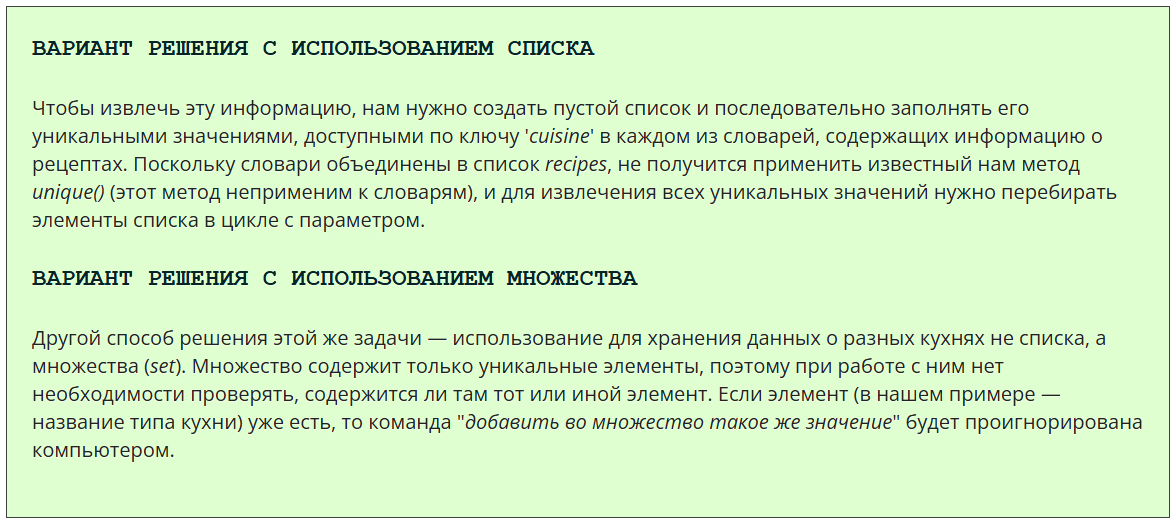

In [ ]:
# Используя список 
cuisines = [] # создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # добавляем его к списку cuisines
len(cuisines) # Выводим на экран полученное значение

20

In [48]:
# Используя множество
cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    cuisines.add(recipe['cuisine']) # добавляем название типа кухни к множеству
len(cuisines) # Выводим на экран полученное значение

20

In [50]:
cuisines = [] 
for recipe in recipes:
    cuisines.append(recipe['cuisine'])

pd.Series(cuisines).describe()

count         500
unique         20
top       italian
freq          101
dtype: object

In [51]:
cuisines = [] # Создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes: # Начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines): # Если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # Добавляем его к списку cuisines
valreccuisine = {} # Создаём пустой словарь для хранения информации об количествах рецептов в каждой кухне
for item in cuisines: # Перебираем список кухонь
    valreccuisine[item] = 0 # Добавляем в словарь ключ, соответствующий очередной кухне
for recipe in recipes: # Перебираем список рецептов
    valreccuisine[recipe['cuisine']] += 1 # Увеличиваем значение нужного ключа в словаре на 1
            
print(max(valreccuisine, key=valreccuisine.get)) # Извлекаем значения для всех ключей используя метод get(), выбираем самое максимальное значение (при наличии одинаковых значений будет выбрано первое в словаре) и выводим на экран ключ максимального значения
          

italian


# 6. JSON. Работаем с pandas. Из JSON в pandas #

ИЗ JSON В PANDAS

→ Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". 

Поскольку структура всех вложенных словарей одинакова, мы можем создать DataFrame на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [52]:
# Импортируем модуль json
import json 
# Импортируем функцию pprint()
from pprint import pprint 
# Импортируем модуль pandas
import pandas as pd 
# Открываем файл и связываем его с объектом "f"
with open('recipes.json') as f: 
    # Загружаем содержимое открытого файла в переменную recipes
    recipes = json.load(f) 
# Создаём объект DataFrame из списка recipes
df = pd.DataFrame(recipes) 
# Выводим на экран первые строки полученного DataFrame
display(df.head())

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


ДОПОЛНИТЕЛЬНО

Для непосредственного считывания содержимого файла recipes.json в переменную df (объект DataFrame) используйте функцию read_json() (с англ. читать_json).

In [53]:
# Импортируем модуль pandas
import pandas as pd 
# Создаём объект DataFrame, загружая содержимое файла recipes.json
df = pd.read_json('recipes.json') 

# Выводим на экран первые строки полученного DataFrame
display(df.head())

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


→ Итак, получившийся DataFrame содержит информацию о рецептах из нашего JSON-файла. 

Каждая строка соответствует одному рецепту, в столбце id хранится его идентификационный номер, в столбце cuisine — тип кухни, а столбец ingredients содержит список, в котором перечислены ингредиенты, необходимые для приготовления блюда.

Такая структура не очень практична, поскольку она не позволяет осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд. Например, представьте, что вы хотите отфильтровать блюда, состоящие не более чем из пяти ингредиентов, или блюда, не содержащие мяса. Сделать это, когда ингредиенты блюд хранятся в списках, не очень просто.

Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце, например:

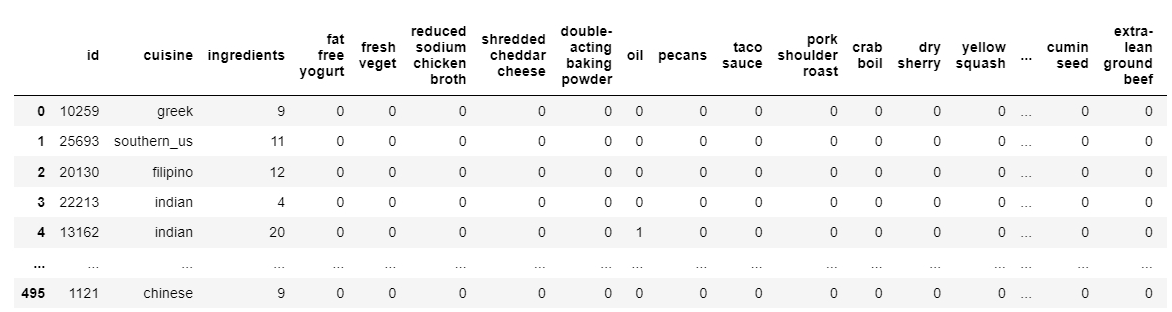

Давайте шаг за шагом преобразуем DataFrame в такой вид.

Работу над преобразованием DataFrame начнём с создания и заполнения столбцов, содержащих сведения о наличии или отсутствии каждого ингредиента в рецепте. Процесс заполнения выполним в два этапа:

1. Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце ingredients для текущего блюда и возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.

2. Организуем цикл, в котором будем перебирать наименования всех ингредиентов DataFrame (для этого потребуется создать реестр, то есть некий список, который содержит уникальные наименования ингредиентов). Для каждого ингредиента создадим в DataFrame столбец с соответствующим названием и заполним его единицами и нулями, применив к DataFrame, а точнее к столбцу ingredients функцию, созданную нами на предыдущем этапе.

In [54]:
# Открываем файл и связываем его с объектом "f"
with open('recipes.json') as f: 
    # Загружаем содержимое открытого файла в переменную recipes
    recipes = json.load(f) 

# Создаем пустое множество для хранения реестра уникальных ингредиентов
all_ingredients=set() 

# Начинаем перебор всех блюд входящих в список
for recipe in recipes: 
    # Начинаем перебор всех ингредиентов входящих в состав текущего блюда
    for ingredient in recipe['ingredients']: 
        # Добавляем уникальный ингредиент в реестр
        all_ingredients.add(ingredient ) 

# Выводим на экран количество уникальных ингредиентов из реестра
print(len(all_ingredients))

1318


→ Теперь определим функцию contains(), с помощью которой мы будем проверять наличие конкретного ингредиента ingredient_name в рецепте текущего блюда, который представлен списком ingredient_list (значение в ячейке столбца ingredients текущего рецепта).

 Функция будет возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует:

In [55]:
# Определяем имя функции и передаваемые аргументы    
def contains(ingredient_list): 
    # Если ингредиент есть в текущем блюде,
    if ingredient_name in ingredient_list:   
        # возвращаем значение 1
        return 1 
    # Если ингредиента нет в текущем блюде,
    else: 
        # возвращаем значение 0
        return 0

Отлично! Осталось лишь перебрать все ингредиенты из ранее созданного реестра all_ingredients с помощью цикла  for  и создать в DataFrame столбец с соответствующим названием, заполнив его единицами и нулями. Для этого применим к DataFrame, а точнее, к столбцу ingredients функцию contains().

In [56]:
# Последовательно перебираем ингредиенты в реестре all_ingredients
for ingredient_name in all_ingredients: 
    # В DataFrame cоздаем столбец с именем текущего ингредиента 
    # и заполняем его единицами и нулями,
    # используя ранее созданную функцию contains
    df[ingredient_name] = df['ingredients'].apply(contains)

C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_34848\547553155.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_34848\547553155.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ingredient_name] = df['ingredients'].apply(contains)
C:\Users\tgorbunov\AppData\Local\Temp\ipykernel_34848\547553155.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

In [57]:
# Заменяем список ингредиентов в рецепте на их количество 
df['ingredients'] = df['ingredients'].apply(len) 
# Выводим содержимое полученного DataFrame на экран
display(df)

,id,cuisine,ingredients,tapioca starch,Mexican cheese blend,non-fat sour cream,chili powder,ground pepper,fresh lime juice,brown sugar,...,octopuses,walnuts,chopped almonds,pickapeppa sauce,diced celery,cajun seasoning,butter lettuce,fresh parmesan cheese,ground turmeric,savoy cabbage
0,10259,greek,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,11,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,20,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1121,chinese,9,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
496,18376,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,17815,italian,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,32878,southern_us,19,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# СОХРАНЯЕМ DATAFRAME В CSV-ФАЙЛЕ #

Если мы планируем продолжать работать с DataFrame, созданными на основе данных, которые мы получили в JSON-формате, то полезно будет сохранить промежуточный DataFrame в виде CSV-файла. Для выполнения этой операции воспользуемся известной нам в Pandas функцией to_csv():

In [58]:
df.to_csv('recipes.csv', index = False)

В качестве основного параметра мы указали имя файла, в котором необходимо сохранить данные. Также мы установили значение параметра index как False. Такая настройка позволит нам не сохранять индексы строк в виде отдельного столбца; в результате не будут загружаться «лишние» данные при открытии файла при помощи функции read_csv().

# 7. JSON. Работаем с pandas. Из pandas в JSON #

→ Решим обратную задачу и создадим JSON-файл из сохранённого ранее CSV-файла, который получили в конце предыдущего этапа. 

Начнём с чтения файла и создания DataFrame на его основе:

In [59]:
# Создаём DataFrame, читаем данные из файла в переменную df
df = pd.read_csv('recipes.csv')

Теперь, используя только данные из этого файла, нам нужно в точности воссоздать структуру исходного JSON-файла. Мы помним, что после десериализации данные представляли собой список, состоящий из словарей. В каждом словаре хранилась информация о рецепте одного блюда. Каждый словарь состоял из трёх пар "ключ-значение". Первая пара содержала название кухни, к которой относилось блюдо, вторая — id блюда, и третья — список ингредиентов входящих в состав блюда.

Поскольку по условию задачи мы не можем использовать предыдущие наработки, давайте начнём с создания списка, содержащего перечень id всех блюд, а также списка ингредиентов, встречающихся в рецептах. Эти списки в дальнейшем мы будем использовать для заполнения JSON-структуры.

Напишите код для создания списка id всех блюд, нужны только уникальные значения представленных в DataFrame. Результирующий список занесите в переменную ids.

In [60]:
df = pd.read_csv('recipes.csv')
ids = list(df['id'].unique())

Напишите код для создания списка ингредиентов всех блюд, представленных в DataFrame. Результирующий список занесите в переменную ingredients.

In [62]:
df=pd.read_csv('recipes.csv')
ingredients=list(df.columns)[3:]

→ Отлично! Теперь мы можем использовать подготовленные списки ids и ingredients для непосредственного создания JSON-структуры.

После десериализации JSON-файла мы получили структуру, представляющую собой список, состоящий из словарей. Каждый словарь состоял из трёх пар "ключ-значение", при этом в качестве значений выступали:

целое число (id блюда);
строковая величина (тип кухни);
список строковых величин (перечень ингредиентов).
Сейчас нам предстоит воссоздать эту структуру, извлекая данные из DataFrame. Для этого необходимо создать:

пустой список new_recipes — для хранения итоговой структуры;
используя код из Задачи 7.1, список ids — для хранения id всех блюд;
используя код из Задачи 7.2, список ingredients — для хранения названий всех ингредиентов.

✍️ Далее необходимо реализовать следующий алгоритм:

1. Написать код функции make_list(), которая принимает на вход строку DataFrame df, содержащую полные данные об одном блюде (в виде Series), и возвращает перечень ингредиентов, входящих в состав этого блюда (в виде списка).

2. Организовать цикл с параметром, в котором будут перебираться элементы списка ids. В результате в процессе прохождения цикла параметр должен принять значение id каждого блюда.

3. На каждом шаге цикла создать словарь, содержащий три пары "ключ-значение":

ключу "id" присвоить текущее значение параметра цикла как целого числа;

ключу "cuisine" присвоить значение соответствующей кухни, которое мы получим, применив фильтр по текущему id к DataFrame df;

ключу "ingredients" присвоить значение списка, воспользовавшись функцией make_list(), созданной на первом шаге алгоритма.

4. Каждый созданный словарь добавить к списку new_recipes:

Напишите код функции make_list(), которая принимает на вход одну строку DataFrame, содержащую данные об одном рецепте (в виде Series), и возвращает перечень ингредиентов этого блюда (в виде списка).

Функция make_list() должна принимать только один аргумент - row. Это будет строка датафрейма.

Не забудьте импортировать необходимые бибилиотеки, считать файл recipes.csv и создать список ingredients.

In [65]:
# Определяем имя функции и передаваемые аргументы
def make_list(row): 
    # Создаем пустой список ингредиентов текущего блюда
    ingredient_list=[] 
    # Последовательно перебираем ингредиенты из реестра
    for ingredient in ingredients: 
        # Если текущий ингредиент входит в состав текущего блюда
        if row[ingredient].item()==1: 
            # Добавляем ингредиент в список ингредиентов текущего блюда
            ingredient_list.append(ingredient) 
    # Возвращаем сформированный список ингредиентов
    return ingredient_list

In [66]:
# Создаём пустой список для хранения итоговой структуры
new_recipes = [] 
# Организуем цикл с параметром current_id
for current_id in ids: 
    # Получаем значение соответствующей кухни, применив фильтр по текущему значению параметра цикла к DataFrame;
    cuisine = df[df['id'] == current_id]['cuisine'].iloc[0] 
    # Получаем перечень ингредиентов, входящих в состав текущего блюда
    current_ingredients = make_list(df[df['id'] == current_id]) 
    # Создаём текущий словарь
    current_recipe = {'cuisine': cuisine, 'id': int(current_id), 'ingredients': current_ingredients} 
    # Добавляем созданный словарь к списку
    new_recipes.append(current_recipe)

Выполним сериализацию списка new_recipes и запишем полученные данные в файл.

Для сериализации  используем функцию dumps(), которой в качестве параметра передадим список new_recipes. Запись в файл осуществляется с помощью метода write(). Предварительно файл необходимо открыть для записи с помощью функции open() c параметром 'w' (от англ. write, рус. писать):

In [67]:
# Импорт модуля json
import json 
# Функция dumps() модуля json сериализирует объект Python в строку формата JSON. 
new_recipes = json.dumps(new_recipes) 

# Откроем файл new_recipes.json для записи
with open("data/new_recipes.json", "w") as write_file: 
    # Записываем содержимое подготовленные данные в файл
    write_file.write(new_recipes)

# 8. XML. Что это? #

→ Аббревиатура XML расшифровывается как eXtensible Markup Language — расширяемый язык разметки. Он (язык) позволяет описывать документы, используя теги.

Если вы когда-нибудь сталкивались с HTML, языком разметки для создания веб-страниц, то можете заметить, что XML очень похож на него. Однако в отличие от HTML, где теги заранее чётко заданы, в XML мы можем задавать теги сами.

Например, если мы хотим описать меню в ресторане в формате XML-документа, мы можем сделать это так:

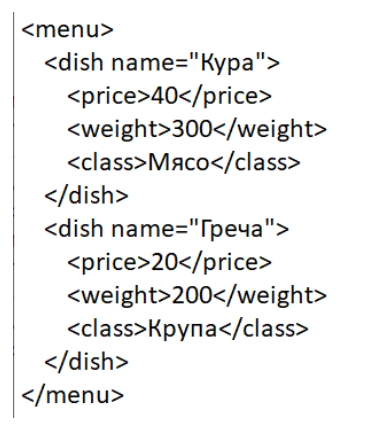

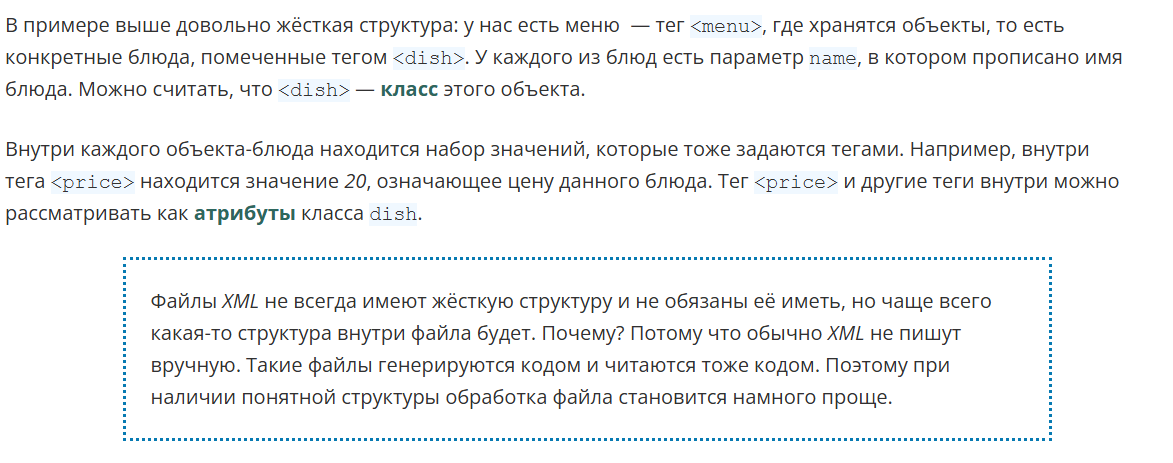

# 9. XML. Контент XML-файла #

## Извлекаем контент из XML-файла ##

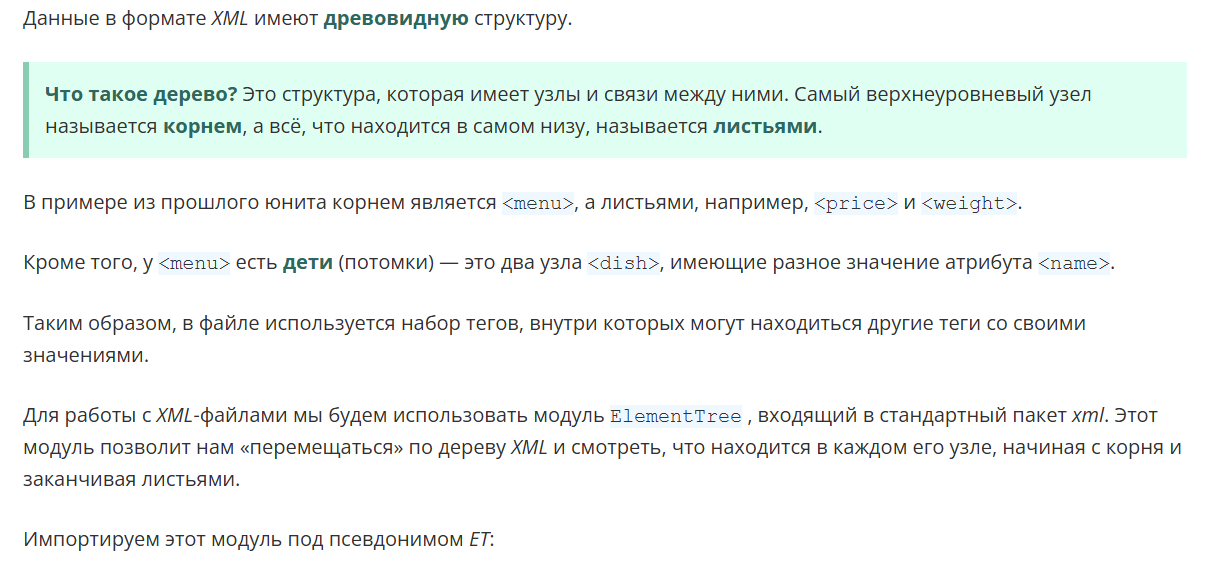

In [68]:
# Импортируем модуль ElementTree
import xml.etree.ElementTree as ET

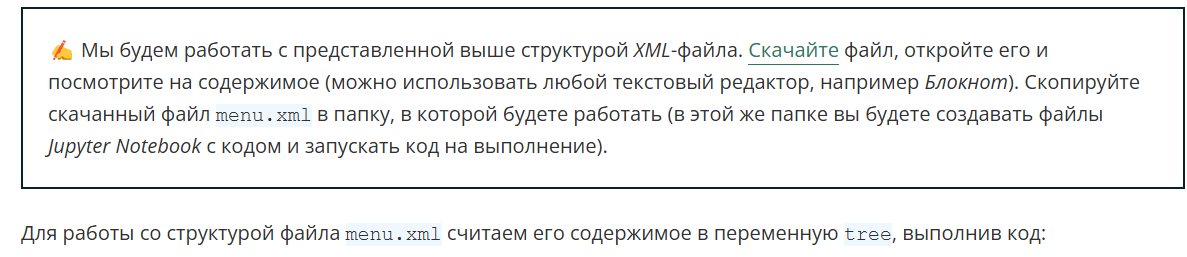

In [69]:
tree = ET.parse('menu.xml')

### Корень ###

Запишем в переменную root корневой узел дерева tree и посмотрим, как выглядит содержимое переменной root, для чего выполним код:

In [70]:
root = tree.getroot()
display(root)

<Element 'menu' at 0x00000111532AF3D0>

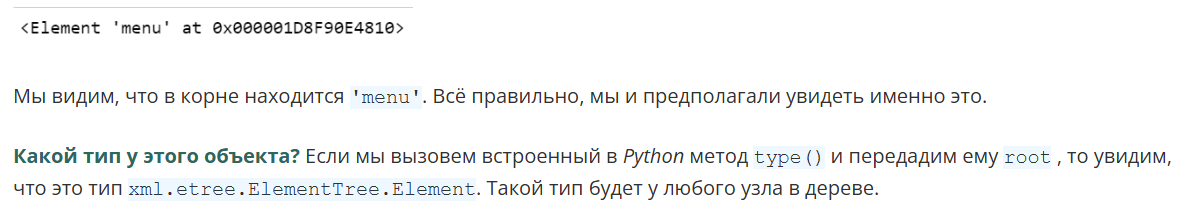

In [71]:
display(type(root))

xml.etree.ElementTree.Element

### Потомки ###

Для того чтобы посмотреть список потомков корневого узла, выполним следующий код:

In [72]:
display(list(root))

[<Element 'dish' at 0x00000111532ADA80>,
 <Element 'dish' at 0x00000111532AF510>]

Если у узла нет потомков, то вернётся пустой список — [].

Итак, использование list(root) возвращает список потомков указанного узла. У узла root, который представляет меню, два потомка, а именно — два блюда, которые представлены тегами dish.

Для того чтобы получить список потомков второго блюда в нашем меню и вывести его на экран, выполним код:

In [73]:
display(list(root[1]))

[<Element 'price' at 0x00000111532AD670>,
 <Element 'weight' at 0x00000111532AC590>,
 <Element 'class' at 0x00000111532AC540>]

Таким образом, у второго потомка узла root —  три потомка.

### Атрибуты и теги ###

Как было сказано ранее, у узлов могут быть параметры, или атрибуты. Например, у узлов dish есть атрибут name, который хранит название блюда.

Мы можем непосредственно обратиться к атрибутам, используя attrib.

Выведем на экран атрибуты первого блюда из меню:

In [74]:
display(root[0].attrib)

{'name': 'Кура'}

В XML-узлах часто хранятся количественные показатели. Эти показатели хранятся в виде текста, и прочитать их можно, обратившись к атрибуту text у соответствующего объекта типа ElementTree.Element.

Например, возьмём узел price первого блюда из меню:

In [75]:
display(root[0][0])

<Element 'price' at 0x00000111532ADAD0>

Теперь прочитаем значение этого узла с помощью text:

In [76]:
display(root[0][0].text)

'40'

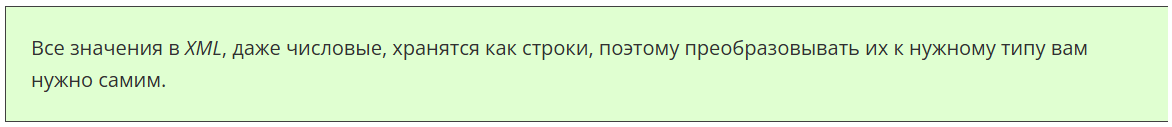

Например, в данном случае можно обернуть значение стоимости в int() или float().

Если вы хотите прочитать наименование тега конкретного узла, необходимо использовать tag. Например, получим наименование тега корневого узла:

In [77]:
display(root.tag)

'menu'

Какое наименование имеет тег узла root[0][2]?

In [82]:
display(root[0][2].tag)

'class'

### Использование циклов ###

→ Итак, мы научились обращаться к отдельным узлам дерева, представляющего XML-структуру, и извлекать информацию о его атрибутах, значении и потомках.

На этом шаге мы решим задачу вывода на экран наименование всех блюд из меню, а также информацию о них (иными словами, нам необходимо обойти дерево и вывести на экран значения его листьев).

Используя цикл for, автоматизируем обход дерева. Для этого напишем следующий код:

In [83]:
for dish in root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



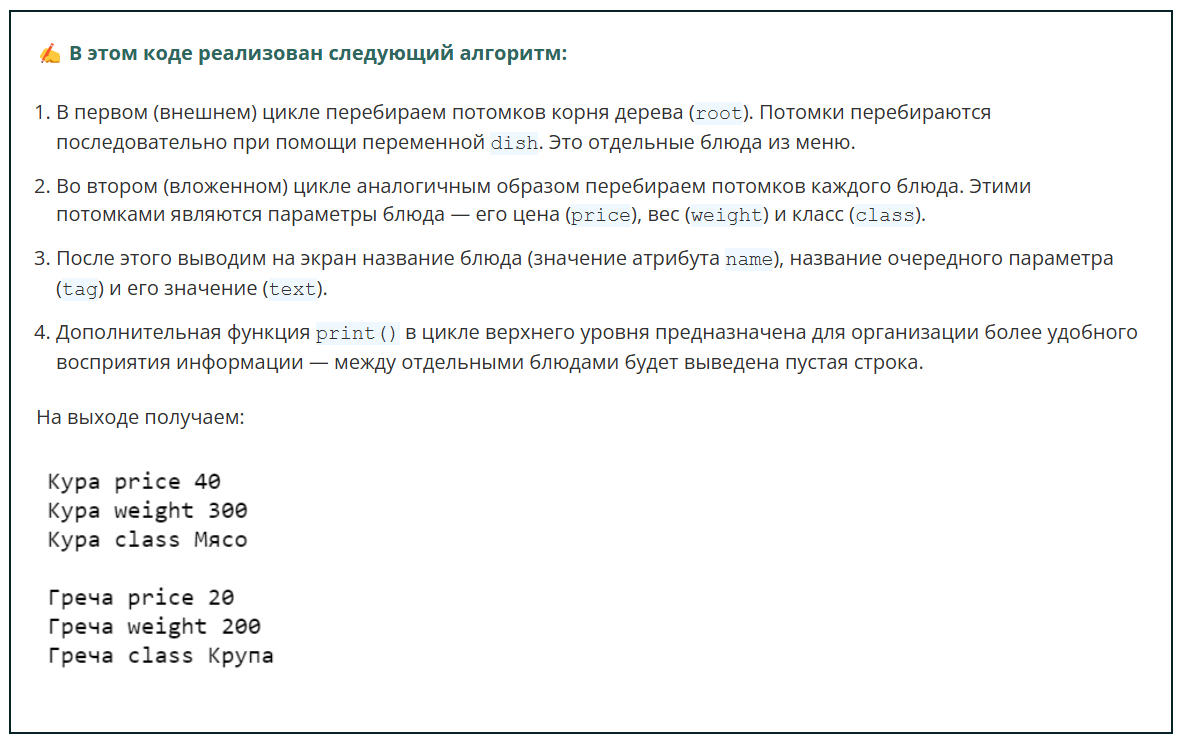

# 10. XML. Загружаем, создаем, сохраняем #

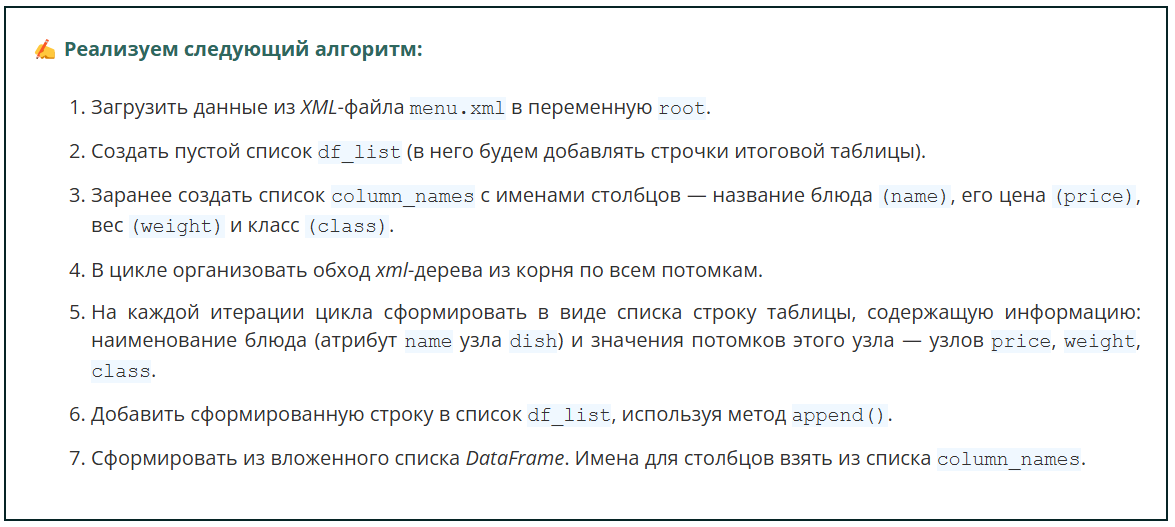

Код, который реализует этот алгоритм:

In [84]:
import xml.etree.ElementTree as ET
tree = ET.parse('menu.xml')
root = tree.getroot()

import pandas as pd
column_names = ['name', 'price', 'weight', 'class']
df_list = []

for dish in root:
    row = [dish.attrib['name'], dish[0].text, dish[1].text, dish[2].text]
    df_list.append(row)

df = pd.DataFrame(df_list, columns=column_names)
display(df)

,name,price,weight,class
0,Кура,40,300,Мясо
1,Греча,20,200,Крупа


### Создаём XML-файл ###

→ Воссоздадим структуру нашего исходного XML-файла с нуля,  руководствуясь общими рекомендациями.

Чтобы создать корень дерева, используем метод Element() из класса ElementTree:

In [85]:
import xml.etree.ElementTree as ET

new_root = ET.Element('menu')
display(new_root)

<Element 'menu' at 0x00000111533F5300>

Теперь мы можем добавлять новые узлы в наше дерево, используя метод SubElement() из того же класса.

Добавим в наше меню двух потомков корневого узла, которые будут представлять два блюда, то есть будут узлами dish:

In [86]:
dish1 = ET.SubElement(new_root, 'dish', name='Кура')

dish2 = ET.SubElement(new_root, 'dish', name='Греча')

display(list(new_root))

[<Element 'dish' at 0x00000111533F4040>,
 <Element 'dish' at 0x0000011153250310>]

В метод SubElement() мы передали первым аргументом узел, к которому добавляем потомка, вторым аргументом — наименование нового тега (dish),  третьим аргументом — наименование атрибута нового узла( name ) и его значение.

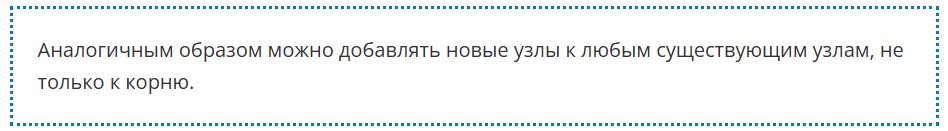

Добавим в создаваемую структуру по три потомка (атрибута) к двум новым узлам, которые будут содержать информацию о блюде — о его цене (price), весе (weight) и классе (class), а также значение этих атрибутов:

In [87]:
price1 = ET.SubElement(dish1, "price").text = "40"
weight1 = ET.SubElement(dish1, "weight").text = "300"
class1 = ET.SubElement(dish1, "class").text = "Мясо"
display(list(dish1))

price2 = ET.SubElement(dish2, "price").text = "20"
weight2 = ET.SubElement(dish2, "weight").text = "200"
class2 = ET.SubElement(dish2, "class").text = "Крупа"
display(list(dish2))

[<Element 'price' at 0x0000011153251350>,
 <Element 'weight' at 0x0000011153253240>,
 <Element 'class' at 0x00000111532516C0>]

[<Element 'price' at 0x000001115324D080>,
 <Element 'weight' at 0x00000111532520C0>,
 <Element 'class' at 0x0000011153253E70>]

Проверим визуально корректность созданной нами структуры, выполнив фрагмент кода, разработанного ранее:

In [88]:
for dish in new_root:    
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



Созданная нами структура полностью идентична структуре исходного XML-файла.

### Сохранение XML-файла ###

→ В финале работы с файлом XML-формата запишем созданную нами структуру как XML-файл на диск.

Преобразуем созданный нами объект типа ElementTree.Element в строку c помощью метода tostring(), передав наше новое дерево как аргумент. Сохраним эту строку на диске, используя стандартные средства Python::

In [89]:
new_root_string = ET.tostring(new_root)

with open("new_menu.xml", "wb") as f:
    f.write(new_root_string)

✍️ Файл записан! Откройте его и посмотрите, что получилось.

Возможно, вы увидите проблему, связанную с кодировкой. Что делать в этом случае? Как вариант — записать файл, используя сам класс ElementTree() :

In [90]:
ET.ElementTree(new_root).write('new_menu_good.xml', encoding="utf-8")

Для этого мы передаём в класс ElementTree() наше дерево (не его строковое представление) и вызываем метод write(). В метод мы передаём путь к новому файлу и нужную нам кодировку.